In [3]:
# For data reading
import pandas as pd 

# For reading the array 
import numpy as np

# For visualize the data and plottting parameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,108]
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For data reading | manipulation :
import pandas as pd 

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

# To suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Import train-test split :
from sklearn.model_selection import train_test_split

# Import 'stats' libraries for modeling :
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

# To scaled the data :
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # Scaling
import math
from sklearn.metrics import  r2_score
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Filling missing values

In [ ]:
nagpur=pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/pollutants/Daily_data/nagpur/nagpur_pre.csv')
nagpur

,Date,SO2,NO2,PM10,PM2.5,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M
0,01-01-15,22.510,45.560,NaN,20.444,21.71,3.46,97.81,73.69,3.99,86.00
1,02-01-15,6.030,35.439,NaN,13.296,22.00,6.91,98.04,74.19,2.28,112.00
2,03-01-15,4.019,26.553,NaN,17.192,19.99,6.55,98.23,85.88,2.62,29.31
3,04-01-15,3.706,27.378,NaN,18.025,20.15,0.19,98.35,70.56,3.95,98.69
4,05-01-15,5.927,28.698,NaN,17.093,17.15,0.00,98.35,57.81,3.17,87.94
...,...,...,...,...,...,...,...,...,...,...,...
1821,27-12-19,21.132,46.198,54.830,21.313,15.15,0.07,98.29,59.81,4.29,21.38
1822,28-12-19,7.310,33.776,53.858,21.824,11.83,0.00,98.43,57.94,3.41,68.00
1823,29-12-19,10.482,44.908,69.024,39.326,12.38,0.00,98.43,58.62,2.76,64.56
1824,30-12-19,7.460,48.152,74.583,35.001,14.22,0.10,98.35,66.81,2.78,75.00


In [ ]:
nagpur['Date'] = nagpur['Date'].apply(pd.to_datetime)

In [ ]:
#finding % of the missing values in each coloumn
nullValues = nagpur.isnull().sum()
nullValues

Date             0
 SO2           706
 NO2           752
PM10           866
 PM2.5         705
T2M              0
PRECTOTCORR      0
PS               0
RH2M             0
WS10M            0
WD10M            0
dtype: int64

In [ ]:
data_fill = nagpur.iloc[:, :12].fillna(nagpur.iloc[:, :12].groupby([ pd.Grouper(key='Date', freq='5D')]).transform('mean'))

In [ ]:
#finding % of the missing values in each coloumn
nullValues = data_fill.isnull().sum()
nullValues

Date             0
 SO2           500
 NO2           515
PM10           720
 PM2.5         500
T2M              0
PRECTOTCORR      0
PS               0
RH2M             0
WS10M            0
WD10M            0
dtype: int64

In [ ]:
data_fill

,Date,SO2,NO2,PM10,PM2.5,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M
0,2015-01-01,22.510,45.560,NaN,20.444,21.71,3.46,97.81,73.69,3.99,86.00
1,2015-02-01,6.030,35.439,NaN,13.296,22.00,6.91,98.04,74.19,2.28,112.00
2,2015-03-01,4.019,26.553,NaN,17.192,19.99,6.55,98.23,85.88,2.62,29.31
3,2015-04-01,3.706,27.378,NaN,18.025,20.15,0.19,98.35,70.56,3.95,98.69
4,2015-05-01,5.927,28.698,NaN,17.093,17.15,0.00,98.35,57.81,3.17,87.94
...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,21.132,46.198,54.830,21.313,15.15,0.07,98.29,59.81,4.29,21.38
1822,2019-12-28,7.310,33.776,53.858,21.824,11.83,0.00,98.43,57.94,3.41,68.00
1823,2019-12-29,10.482,44.908,69.024,39.326,12.38,0.00,98.43,58.62,2.76,64.56
1824,2019-12-30,7.460,48.152,74.583,35.001,14.22,0.10,98.35,66.81,2.78,75.00


In [ ]:
data_fill = nagpur.iloc[:, :12].fillna(nagpur.iloc[:, :12].groupby([ pd.Grouper(key='Date', freq='15D')]).transform('mean'))

In [ ]:
#finding % of the missing values in each coloumn
nullValues = data_fill.isnull().sum()
nullValues

Date           0
 SO2           0
 NO2           0
PM10           0
 PM2.5         0
T2M            0
PRECTOTCORR    0
PS             0
RH2M           0
WS10M          0
WD10M          0
dtype: int64

In [ ]:


# Imputing missing values by beckward fill :

data_fill = data_fill.fillna(method = 'bfill',axis=0)



In [ ]:


# Imputing missing values by beckward fill :

data_fill = data_fill.fillna(method = 'ffill',axis=0)



In [ ]:
data_fill.to_csv('filled.csv', index=False)

###Train test split

In [4]:
nagpur=pd.read_csv('/content/drive/Othercomputers/My Laptop/MTech/Project/New/pollutants/Daily_data/nagpur/nagpur_aqiml.csv')
nagpur

,Date,SO2,NO2,PM10,PM2.5,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M,AQI
0,01-01-15,22.510,45.560,70.3938,20.444,21.71,3.46,97.81,73.69,3.99,86.00,70.393800
1,02-01-15,6.030,35.439,70.3938,13.296,22.00,6.91,98.04,74.19,2.28,112.00,70.393800
2,03-01-15,4.019,26.553,70.3938,17.192,19.99,6.55,98.23,85.88,2.62,29.31,70.393800
3,04-01-15,3.706,27.378,70.3938,18.025,20.15,0.19,98.35,70.56,3.95,98.69,70.393800
4,05-01-15,5.927,28.698,70.3938,17.093,17.15,0.00,98.35,57.81,3.17,87.94,70.393800
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,27-12-19,21.132,46.198,54.8300,21.313,15.15,0.07,98.29,59.81,4.29,21.38,57.747500
1822,28-12-19,7.310,33.776,53.8580,21.824,11.83,0.00,98.43,57.94,3.41,68.00,53.858000
1823,29-12-19,10.482,44.908,69.0240,39.326,12.38,0.00,98.43,58.62,2.76,64.56,69.024000
1824,30-12-19,7.460,48.152,74.5830,35.001,14.22,0.10,98.35,66.81,2.78,75.00,74.583000


In [5]:
nagpur=nagpur.drop(['Date'],axis=1)

###Correlation

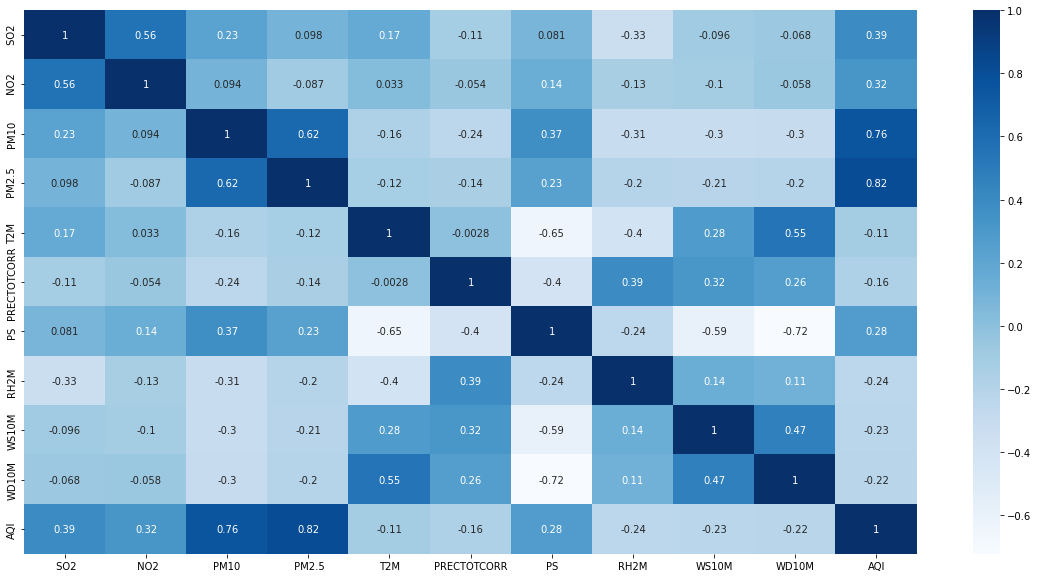

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(nagpur.corr(), annot=True, cmap='Blues')

plt.show()

The impact of   SO2 on AQI


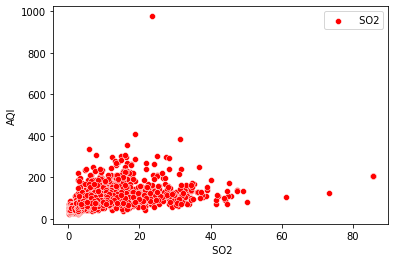

The impact of   NO2 on AQI


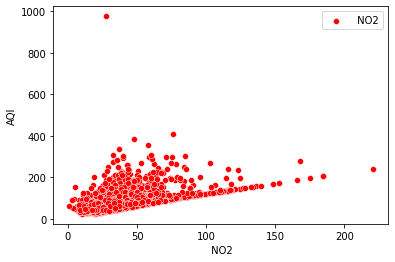

The impact of  PM10 on AQI


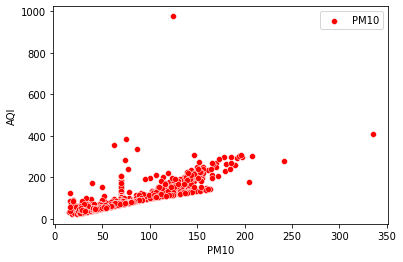

The impact of   PM2.5 on AQI


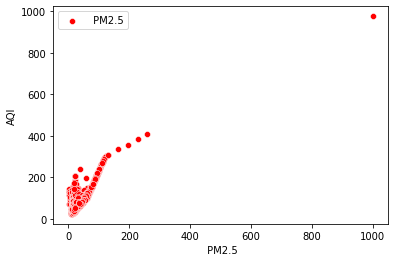

The impact of  T2M on AQI


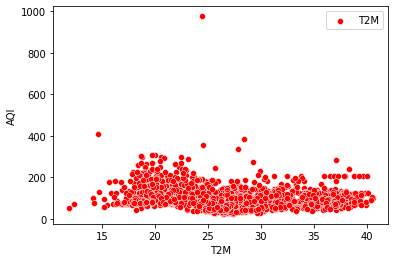

The impact of  PRECTOTCORR on AQI


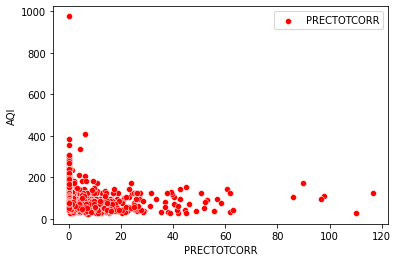

The impact of  PS on AQI


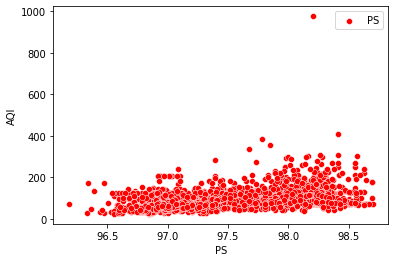

The impact of  RH2M on AQI


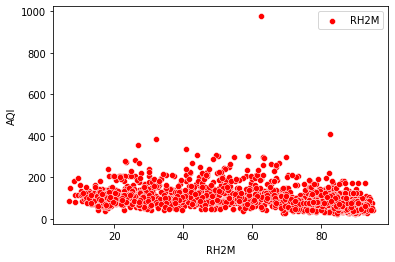

The impact of  WS10M on AQI


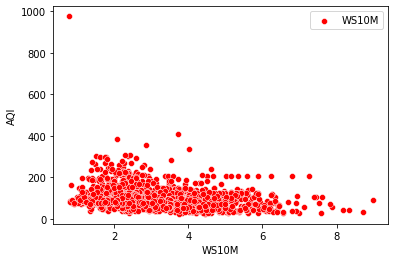

The impact of  WD10M on AQI


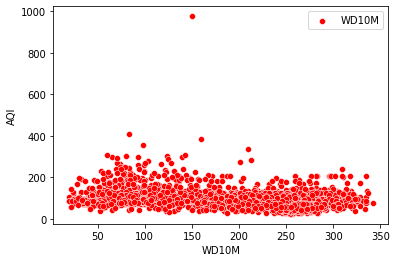

The impact of  AQI on AQI


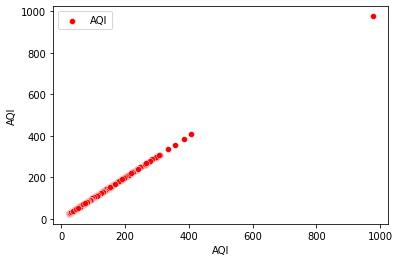

In [ ]:
# Check the effect of all pollutants on AQI :

for i in nagpur.iloc[:, :12]:
    print('The impact of ', i, 'on AQI')
    sns.scatterplot(x = i, y ='AQI', data = nagpur,marker="o",sizes=200,color="r",label=i)
    plt.legend()
    plt.show()

###Independent and dependent variables

In [6]:
 x=nagpur.iloc[:,:-1]
y=nagpur.iloc[:,-1]

In [7]:
x

,SO2,NO2,PM10,PM2.5,T2M,PRECTOTCORR,PS,RH2M,WS10M,WD10M
0,22.510,45.560,70.3938,20.444,21.71,3.46,97.81,73.69,3.99,86.00
1,6.030,35.439,70.3938,13.296,22.00,6.91,98.04,74.19,2.28,112.00
2,4.019,26.553,70.3938,17.192,19.99,6.55,98.23,85.88,2.62,29.31
3,3.706,27.378,70.3938,18.025,20.15,0.19,98.35,70.56,3.95,98.69
4,5.927,28.698,70.3938,17.093,17.15,0.00,98.35,57.81,3.17,87.94
...,...,...,...,...,...,...,...,...,...,...
1821,21.132,46.198,54.8300,21.313,15.15,0.07,98.29,59.81,4.29,21.38
1822,7.310,33.776,53.8580,21.824,11.83,0.00,98.43,57.94,3.41,68.00
1823,10.482,44.908,69.0240,39.326,12.38,0.00,98.43,58.62,2.76,64.56
1824,7.460,48.152,74.5830,35.001,14.22,0.10,98.35,66.81,2.78,75.00


In [8]:
y

0        70.393800
1        70.393800
2        70.393800
3        70.393800
4        70.393800
           ...    
1821     57.747500
1822     53.858000
1823     69.024000
1824     74.583000
1825    407.415385
Name: AQI, Length: 1826, dtype: float64

In [9]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

###Feature transformation

In [10]:
from sklearn.preprocessing import PowerTransformer
pt_x = PowerTransformer(method='yeo-johnson')
pt_y = PowerTransformer(method='yeo-johnson')
x_train = pt_x.fit_transform(x_train)
x_test = pt_x.transform(x_test)
y_train = pt_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = pt_y.transform(np.array(y_test).reshape(-1,1))


###SVR

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([ 1.89972917e-01,  1.77630703e-01,  9.16870446e-01,  1.25475599e-02,
       -1.55184401e-01,  8.25853375e-01, -5.69035447e-01, -3.04773413e-01,
        8.15165574e-01, -7.84719933e-01,  6.57733239e-01, -7.30251830e-01,
        9.79365308e-01, -1.75423087e-01,  6.99578329e-01, -2.01360503e+00,
        6.67977607e-01, -6.98449587e-01,  1.35417597e+00,  2.46994698e+00,
        6.43279748e-01, -1.71762446e-01,  9.21446836e-01, -1.67802337e+00,
       -1.15023920e-03, -3.64313947e-01, -1.81223987e-01, -1.05691596e-01,
        1.86231558e+00,  2.98745814e-01, -2.43910470e-01,  3.95910489e-01,
       -2.81991047e+00,  1.70152335e+00, -1.51643801e+00, -3.49284841e-01,
       -1.23502519e+00, -1.49526154e+00,  1.46601371e+00,  6.83276774e-01,
        5.16007423e-01,  1.14158872e+00, -2.09340933e-01,  6.35474118e-01,
        3.31180575e-01, -2.74864641e-01, -8.48867029e-01, -4.15891082e-01,
        6.57006800e-01, -7.56166638e-01, -4.56176668e-02,  1.54283699e+00,
       -2.10821330e+00,  

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9709692870022694
mean_sqrd_error is  0.027907933908512865
Root mean squared error of is 0.16705667873064178
Mean Absolute error is 0.11124695134092821


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 97.21944444],
       [ 97.21944444],
       [138.263     ],
       [ 91.825     ],
       [ 86.18619048]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[100.17467063],
       [ 99.63256963],
       [138.02746933],
       [ 92.6620187 ],
       [ 86.0865784 ]])

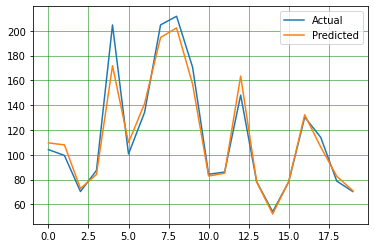

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,97.219444,100.174671,-2.955226,3.039748
1,97.219444,99.632570,-2.413125,2.482143
2,138.263000,138.027469,0.235531,0.170350
3,91.825000,92.662019,-0.837019,0.911537
4,86.186190,86.086578,0.099612,0.115578
5,139.958889,132.583037,7.375852,5.270013
6,70.393800,71.815365,-1.421565,2.019446
7,76.247500,80.622834,-4.375334,5.738331
8,130.563000,131.958253,-1.395253,1.068643
9,70.393800,65.353702,5.040098,7.159860


###KNN

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
hp_candidates = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsRegressor()
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=5, scoring='r2')
grid.fit(x_train, y_train)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.9101619660777296
KNeighborsRegressor(weights='distance')
{'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
regressor=KNeighborsRegressor(n_neighbors=21, weights='distance')
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=21, weights='distance')

In [ ]:
y_prediction =  regressor.predict(x_test)
y_prediction

array([[ 2.31977716e-01],
       [ 3.48220883e-01],
       [ 4.57527730e-01],
       [-1.02487169e-01],
       [ 1.73453714e-01],
       [ 5.63504281e-01],
       [-5.11218005e-01],
       [-2.91547839e-01],
       [ 4.51180301e-01],
       [-6.33946388e-01],
       [ 5.59477685e-01],
       [-9.62991883e-01],
       [ 9.29633138e-01],
       [-1.32130372e-02],
       [ 7.36165455e-01],
       [-2.04795150e+00],
       [ 5.37063570e-01],
       [-4.99641933e-01],
       [ 6.88413748e-01],
       [ 8.60789526e-01],
       [ 6.41555288e-01],
       [-2.04741719e-01],
       [ 5.49422876e-01],
       [-1.30645743e+00],
       [-1.81713151e-01],
       [-5.65999658e-01],
       [-2.87098557e-01],
       [ 2.24694222e-01],
       [ 1.63989210e+00],
       [ 1.21929284e-01],
       [-4.35171976e-01],
       [ 5.13095649e-01],
       [-2.50242350e+00],
       [ 1.54626095e+00],
       [-1.63312864e+00],
       [-3.74518458e-01],
       [-1.68589564e+00],
       [-1.16884619e+00],
       [ 1.4

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.8742005014917812
mean_sqrd_error is  0.12093413242609218
Root mean squared error of is 0.34775585174960344
Mean Absolute error is 0.2517700620459228


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 97.21944444],
       [ 97.21944444],
       [138.263     ],
       [ 91.825     ],
       [ 86.18619048]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[102.0422169 ],
       [107.39729509],
       [112.69380004],
       [ 88.09969189],
       [ 99.44978249]])

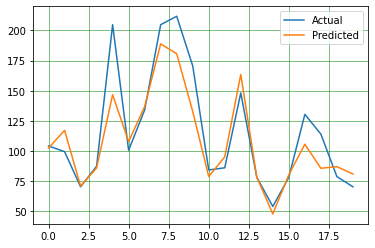

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,97.219444,102.042217,-4.822772,4.960708
1,97.219444,107.397295,-10.177851,10.468945
2,138.263000,112.693800,25.569200,18.493162
3,91.825000,88.099692,3.725308,4.056965
4,86.186190,99.449782,-13.263592,15.389463
5,139.958889,118.083036,21.875852,15.630199
6,70.393800,73.655039,-3.261239,4.632850
7,76.247500,81.091378,-4.843878,6.352835
8,130.563000,112.379080,18.183920,13.927315
9,70.393800,69.805392,0.588408,0.835880


###Random forest

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)



In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}  



In [ ]:
regressor = RandomForestRegressor(n_estimators = 20, min_samples_split = 6, min_samples_leaf= 3, max_features = 'auto', max_depth= 70, bootstrap=True) 
regressor.fit( x_train, y_train) 

RandomForestRegressor(max_depth=70, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=20)

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([ 0.12184833,  0.12378904,  0.90440117, -0.00768066, -0.09863366,
        0.94720239, -0.61475006, -0.45252653,  0.81130126, -0.61475006,
        0.6941115 , -0.52721602,  0.73314317, -0.22726711,  0.69541909,
       -2.15205134,  0.83371975, -0.61497862,  1.53406049,  1.0601534 ,
        0.69541909, -0.21635557,  0.94819692, -1.99261098, -0.00561988,
       -0.61475006, -0.12694205, -0.17874244,  1.86867546,  0.50408919,
       -0.30268678,  0.45828775, -2.80345589,  1.97695326, -1.33846963,
       -0.21653354, -1.11648329, -1.4352095 ,  1.61349775,  0.49710618,
        0.49942627,  1.17214331, -0.27129607,  0.62257867,  0.22278103,
       -0.29499235, -0.85201536, -0.49409817,  0.48539293, -0.61475006,
        0.04380353,  1.64842956, -2.0722384 ,  0.69767433,  0.62394909,
       -0.00811966, -0.2949759 , -1.74366173,  0.73970684,  0.9448858 ,
       -0.14159533, -0.2949759 ,  1.5311266 , -0.37228529, -1.03298251,
       -1.21541131, -2.31793945, -0.40599471, -1.08868079, -0.35

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9779267467558262
mean_sqrd_error is  0.02121955780873944
Root mean squared error of is 0.14566934409387391
Mean Absolute error is 0.035964608377429735


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 97.21944444],
       [ 97.21944444],
       [138.263     ],
       [ 91.825     ],
       [ 86.18619048]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 97.21944444],
       [ 97.30239243],
       [137.26830718],
       [ 91.84269941],
       [ 88.24876521]])

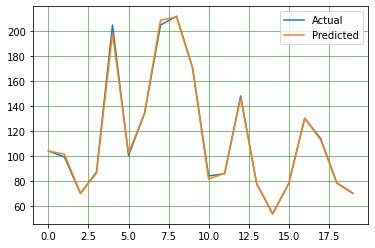

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,97.219444,97.219444,0.000000,0.000000
1,97.219444,97.302392,-0.082948,0.085320
2,138.263000,137.268307,0.994693,0.719421
3,91.825000,91.842699,-0.017699,0.019275
4,86.186190,88.248765,-2.062575,2.393161
5,139.958889,139.892090,0.066799,0.047727
6,70.393800,70.393800,0.000000,0.000000
7,76.247500,75.571413,0.676087,0.886701
8,130.563000,131.733094,-1.170094,0.896191
9,70.393800,70.393800,0.000000,0.000000


###without tunning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_fs,y_train)

RandomForestRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test_fs)
y_prediction 



array([ 0.121715  ,  0.12281205,  0.90343906, -0.00811966, -0.15955412,
        0.94795579, -0.61475006, -0.45562584,  0.79225848, -0.61475006,
        0.69596611, -0.56466137,  0.73216401, -0.22376218,  0.69541909,
       -2.21257348,  0.83373927, -0.61443303,  1.53598402,  1.83296473,
        0.69541909, -0.21635557,  0.9533317 , -2.03536541, -0.00745848,
       -0.61475006, -0.12251204, -0.17774767,  1.87207125,  0.51699996,
       -0.30412831,  0.32261602, -2.75710132,  1.96514355, -1.387653  ,
       -0.24189464, -1.1394099 , -1.42234628,  1.60796623,  0.49928985,
        0.50227158,  1.17709566, -0.27622537,  0.61657998,  0.21219654,
       -0.2949759 , -0.89845594, -0.50549999,  0.48463103, -0.61475006,
        0.04312054,  1.64175579, -2.11021521,  0.68639178,  0.62394367,
       -0.00811966, -0.2949759 , -1.69366671,  0.76109691,  0.97146061,
       -0.1365689 , -0.2949759 ,  1.52935351, -0.37116298, -1.01826346,
       -1.25617741, -2.38659344, -0.41666321, -1.08292624, -0.35

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9875904393917344
mean_sqrd_error is  0.01192961389946682
Root mean squared error of is 0.10922277189060357
Mean Absolute error is 0.02928058679634179


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 97.21944444],
       [ 97.21944444],
       [138.263     ],
       [ 91.825     ],
       [ 86.18619048]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 97.21374823],
       [ 97.26062561],
       [137.20990877],
       [ 91.825     ],
       [ 85.92176125]])

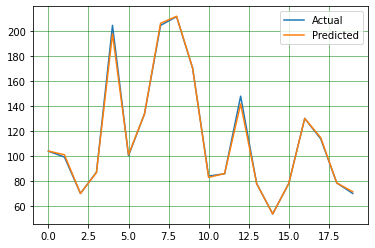

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,97.219444,97.213748,0.005696,0.005859
1,97.219444,97.260626,-0.041181,0.042359
2,138.263000,137.209909,1.053091,0.761658
3,91.825000,91.825000,0.000000,0.000000
4,86.186190,85.921761,0.264429,0.306812
5,139.958889,139.938730,0.020159,0.014403
6,70.393800,70.393800,0.000000,0.000000
7,76.247500,75.468962,0.778538,1.021067
8,130.563000,130.629251,-0.066251,0.050743
9,70.393800,70.393800,0.000000,0.000000


###Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:


y_prediction =  regressor.predict(x_test)
y_prediction 



array([ 1.08888731e-01,  1.03765225e-01,  8.86288784e-01, -1.52093415e-02,
       -2.10682797e-01,  9.36889825e-01, -5.63187341e-01, -4.35689187e-01,
        7.63417749e-01, -5.86391094e-01,  6.79134988e-01, -7.64119058e-01,
        8.08627506e-01, -2.07144688e-01,  6.93426502e-01, -2.05303977e+00,
        7.98279108e-01, -5.65486745e-01,  1.53945125e+00,  2.48604148e+00,
        6.91667985e-01, -2.12762869e-01,  9.45373030e-01, -2.06159408e+00,
       -2.32618700e-03, -6.49514925e-01, -1.41976199e-01, -1.85690670e-01,
        1.88135001e+00,  3.83393487e-01, -3.00160178e-01,  4.16311009e-01,
       -2.72020465e+00,  1.96761605e+00, -1.30815361e+00, -2.51763505e-01,
       -1.07488166e+00, -1.41010575e+00,  1.62317548e+00,  5.82808597e-01,
        4.00784796e-01,  1.19407463e+00, -2.94401182e-01,  6.30903299e-01,
        3.20740205e-01, -2.89825692e-01, -8.97643754e-01, -5.20718625e-01,
        4.74678413e-01, -5.87124731e-01,  5.40811595e-02,  1.62338703e+00,
       -2.05094007e+00,  

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9863695866297625
mean_sqrd_error is  0.013103249496904683
Root mean squared error of is 0.11446942603553441
Mean Absolute error is 0.05967857134699088


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 97.21944444],
       [ 97.21944444],
       [138.263     ],
       [ 91.825     ],
       [ 86.18619048]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 96.66737828],
       [ 96.4500024 ],
       [136.17315789],
       [ 91.53964309],
       [ 84.01693226]])

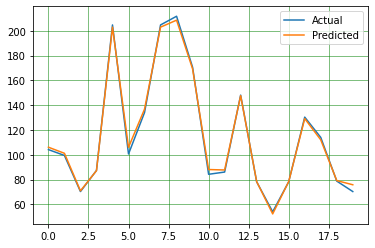

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:


result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)



,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,97.219444,96.667378,0.552066,0.567856
1,97.219444,96.450002,0.769442,0.791449
2,138.263000,136.173158,2.089842,1.511498
3,91.825000,91.539643,0.285357,0.310762
4,86.186190,84.016932,2.169258,2.516944
5,139.958889,139.255271,0.703618,0.502732
6,70.393800,71.999307,-1.605507,2.280751
7,76.247500,76.130457,0.117043,0.153504
8,130.563000,128.975385,1.587615,1.215976
9,70.393800,71.272271,-0.878471,1.247937


###Ensembling approach

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

In [ ]:
estimators = [('rf',rf),('gb',gb),('svr',svr)]

In [ ]:


for estimator in estimators:
  scores = cross_val_score(estimator[1],x_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))



rf 0.99
gb 0.99
svr 0.96


In [ ]:

from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,x_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.98


In [ ]:
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('svr', SVR())])

In [ ]:


y_prediction =  vr.predict(x_test)
y_prediction 



array([ 1.40236660e-01,  1.34022317e-01,  9.08022256e-01, -3.59381480e-03,
       -1.75058291e-01,  9.03944774e-01, -5.82324282e-01, -3.96469519e-01,
        7.92357838e-01, -6.61953695e-01,  6.76865186e-01, -6.85620240e-01,
        8.40235570e-01, -2.00551306e-01,  6.96141308e-01, -2.08720953e+00,
        7.66669322e-01, -6.26175958e-01,  1.47640474e+00,  2.23900546e+00,
        6.76788942e-01, -2.00055509e-01,  9.39673608e-01, -1.92206092e+00,
       -3.77201378e-03, -5.42859644e-01, -1.49321355e-01, -1.56359807e-01,
        1.87249525e+00,  4.02243181e-01, -2.82520344e-01,  3.85494300e-01,
       -2.76102961e+00,  1.87803063e+00, -1.40356319e+00, -2.81382275e-01,
       -1.14425496e+00, -1.44701333e+00,  1.56418911e+00,  5.93869564e-01,
        4.73794735e-01,  1.17150001e+00, -2.57354408e-01,  6.27725430e-01,
        2.91601529e-01, -2.86599860e-01, -8.83181308e-01, -4.86945582e-01,
        5.38812267e-01, -6.52680476e-01,  1.58476236e-02,  1.60364121e+00,
       -2.09486980e+00,  

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9876314896962821
mean_sqrd_error is  0.011890151238445343
Root mean squared error of is 0.1090419700777886
Mean Absolute error is 0.055831046821730734


In [ ]:
y_test = pt_y.inverse_transform(y_test)
y_test[:5]

array([[ 97.21944444],
       [ 97.21944444],
       [138.263     ],
       [ 91.825     ],
       [ 86.18619048]])

In [ ]:
y_prediction=y_prediction.reshape(-1,1)
y_prediction = pt_y.inverse_transform(y_prediction)
y_prediction[:5]

array([[ 98.00827697],
       [ 97.74096504],
       [137.48832864],
       [ 92.00763636],
       [ 85.33955549]])

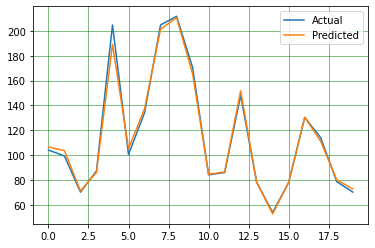

In [ ]:
df1 = pd.DataFrame({'Actual': y_test[100:120].flatten(), 'Predicted': y_prediction[100:120].flatten()})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:


result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_prediction
result["DIFFERNCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(15)



,ACTUAL AQI,PREDICTED AQI,DIFFERNCE,PERCENTAGE ERROR
0,97.219444,98.008277,-0.788833,0.811394
1,97.219444,97.740965,-0.521521,0.536437
2,138.263000,137.488329,0.774671,0.560288
3,91.825000,92.007636,-0.182636,0.198896
4,86.186190,85.339555,0.846635,0.982333
5,139.958889,137.240602,2.718287,1.942204
6,70.393800,71.399155,-1.005355,1.428187
7,76.247500,77.448975,-1.201475,1.575757
8,130.563000,130.634986,-0.071986,0.055135
9,70.393800,68.955835,1.437965,2.042744
